In [ ]:
#1.数据库
    4.1 ORM 的介绍
    4.2 mysql配置 --django
    4.3 定义模型类
    4.4 字段和选项 介绍
    4.5 数据库操作
    4.6 查询
        # 1.过滤查询: filter() exclude()
        # 属性名字__符号 = 值
        

         # 2. F对象  多属性对比
              

        # 3.排序和聚合查询
       

        # 4.关联查询
          

        # 5.关联过滤查询



    4.7 查询集
        
        
    4.8 自定义管理器Manage ORM objects

        1. 修改 all()函数 返回的没有 逻辑删除的数据
        2. 新增 create_book()



    # 5.Admin站点 考完试之后 写  1遍即可


In [ ]:
# 1.模板 Template
# 1.1 Django自带的模板
    # 1.1.1 配置 django 的templates文件夹的路径 --settings.py
    # 1.1.2 基本使用模板语法:
            # 1. 模板变量 {{ name }} {{ data_list.0 }} {{data_dict.key}}
            # 2. for模板语句
                    {% for item in list%}
                        {{forloop.counter}}---{{item}}
                        {% empty%}
                    {% endfor %}
            # 3. 条件语句
                 {% if age > 10 %}
                 {% endif %}

    # 1.1.3 django自带过滤器
        # {{ name | 过滤器:参数 }}
        # 过滤器--本质--函数
        # length
        #  default
        # date 日期格式化
        # safe 

    # 1.1.4 django自定义过滤器--7步
        # 1. 子应用里面-- tempaltetags包
        # 2. 在包里面  xxx.py
        # 3. xxx.py --> 导包 from django import template
                 # 4.   register = template.Library()
                 # 5.   @register.filter
                        def sum_xx(x):
                            return
        # 6. templates--index.html  {% load xxx %}
        #                       {{ name | sum_xx }}

    # 1.1.5 模板继承
        *  1.template---afather.html bson.html
        *  2.afather.html ---> 随意写个标签
        *  3.bson.html----> ` {% extends "父html文件路径"%}` 
        *  4.views.py---> ` return render(request,'bson.html')` 
        *  5.afather.html --> ` {% block 名字 %} 父内容 {% endblock 名字%} ` 
        *  6.bson.html  ` {% block 名字 %} {% endblock 名字%}` 
        *  7.bson.html ` {{ block.super }}` 

    
# 1.2 jinja2模板 第三方
    # 作用: 跑的快, 做的多
    # 1.2.1 jinja2 配置
        # 1. pip install jinja2 在虚拟环境里面
        # 2. 项目路径下---jinja2_env.py-- 实例环境返回
        # 3. settings.py-- 粘贴

    # 1.2.2 jinja2的 使用   
        # 1. {{ data_dict['k']}} {{ data_list[0]}}
        # 2. for : loop.index0 == forloop.counter0 ; {%else%} ==  {% empty%}
        # 3. 自定义过滤器 2步

    # CSRF攻击 

#1.数据库
    4.1 ORM 的介绍

    4.2 mysql配置 --django
        1. 虚拟环境 pip install pymysql
        2. 同名子目录--init.py ---粘贴代码
        3. settigns.py --粘贴代码
        4. 去mysql客户端--创建对应的数据库

    4.3 定义模型类

    4.4 字段和选项 介绍
    4.5 数据库操作(提前插入 测试数据)
        # 增 save()  create()
    4.6 查询
        # 1.过滤查询: filter() exclude()
        # 属性名字__符号 = 值
        # 过滤查询: filter(属性__运算符=值) exclude(不包含) all() --->querySet 查询集
        # 过滤运算符:
        # 1.判断相等  exact
        # 2.判空     isnull
        # 3.范围     in
        # 4.模糊查询  contains startswith endswith
        # 5.条件    gt lt gte lte
        # 6.year month day hour
        
            # 阅读量大于 评论量
            from django.db.models import F,Q
         # 2. F对象  多属性对比
            BookInfo.objects.filter(bread__gt=F('bcomment'))
            # id<3 且 阅读量大于20
            # id<3 或 阅读量大于20
              Q对象  多条件
            # 默认 多条件 就 且的关系
            BookInfo.objects.filter(id__lt=3,bread__gt=20)
            BookInfo.objects.filter(Q(id__lt=3) & Q(bread__gt=20))

            # python and or  not
            # orm    &    |   ~
            BookInfo.objects.filter(~Q(id=3))
              
        # 3.排序和聚合查询
          # count() 统计个数
            # 聚合查询 aggregate() -->Sum() Avg,Max,Min,Count
            # 求 bread 的总和
            from django.db.models import Sum,Avg,Max,Min,Count
            BookInfo.objects.aggregate(Sum('bread'))

            # 排序 默认升序,  降序 -id order_by()
            BookInfo.objects.order_by('-id')

        # 4.关联查询
            # 1.根据 书 --所有的英雄all()
            book = BookInfo.objects.get(id=2)
            book.heroinfo_set.all()

          # 1:n(外键)--- 关联模型类纯小写_set 或者 related_name
          # n(外键):1---- 直接外键属性
            # 2.根据英雄 --那本书
            hero = HeroInfo.objects.get(hname="郭靖")
            hero.hbook 

        # 5.关联过滤查询
        BookInfo.objects.filter()

        查询图书，要求图书英雄为"任盈盈"
        BookInfo.objects.filter(heroinfo__hname__exact="任盈盈")
        # 1:n
        # n:1
        查询书名为“天龙八部”的所有英雄。
        HeroInfo.objects.filter(hbook__btitle="天龙八部")



    4.7 查询集 querySet all() filter() order_by()  exclude()
        # 1. 惰性执行--懒加载
        # 2. 缓存
        
        
    4.8 自定义管理器Manage == objects

        1. 修改 all()函数 返回的没有 逻辑删除的数据
        2. 新增 create_book()




    # 5.Admin站点 考完试之后 写  1遍即可

    https://blog.csdn.net/may_ths/article/details/84032217
    K6IXATEF43-eyJsaWNlbnNlSWQiOiJLNklYQVRFRjQzIiwibGljZW5zZWVOYW1lIjoi5o6I5p2D5Luj55CG5ZWGOiBodHRwOi8vaWRlYS5oay5jbiIsImFzc2lnbmVlTmFtZSI6IiIsImFzc2lnbmVlRW1haWwiOiIiLCJsaWNlbnNlUmVzdHJpY3Rpb24iOiIiLCJjaGVja0NvbmN1cnJlbnRVc2UiOmZhbHNlLCJwcm9kdWN0cyI6W3siY29kZSI6IklJIiwiZmFsbGJhY2tEYXRlIjoiMjAxOS0wNi0wNSIsInBhaWRVcFRvIjoiMjAyMC0wNi0wNCJ9LHsiY29kZSI6IkFDIiwiZmFsbGJhY2tEYXRlIjoiMjAxOS0wNi0wNSIsInBhaWRVcFRvIjoiMjAyMC0wNi0wNCJ9LHsiY29kZSI6IkRQTiIsImZhbGxiYWNrRGF0ZSI6IjIwMTktMDYtMDUiLCJwYWlkVXBUbyI6IjIwMjAtMDYtMDQifSx7ImNvZGUiOiJQUyIsImZhbGxiYWNrRGF0ZSI6IjIwMTktMDYtMDUiLCJwYWlkVXBUbyI6IjIwMjAtMDYtMDQifSx7ImNvZGUiOiJHTyIsImZhbGxiYWNrRGF0ZSI6IjIwMTktMDYtMDUiLCJwYWlkVXBUbyI6IjIwMjAtMDYtMDQifSx7ImNvZGUiOiJETSIsImZhbGxiYWNrRGF0ZSI6IjIwMTktMDYtMDUiLCJwYWlkVXBUbyI6IjIwMjAtMDYtMDQifSx7ImNvZGUiOiJDTCIsImZhbGxiYWNrRGF0ZSI6IjIwMTktMDYtMDUiLCJwYWlkVXBUbyI6IjIwMjAtMDYtMDQifSx7ImNvZGUiOiJSUzAiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiUkMiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiUkQiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiUEMiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiUk0iLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiV1MiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiREIiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiREMiLCJmYWxsYmFja0RhdGUiOiIyMDE5LTA2LTA1IiwicGFpZFVwVG8iOiIyMDIwLTA2LTA0In0seyJjb2RlIjoiUlNVIiwiZmFsbGJhY2tEYXRlIjoiMjAxOS0wNi0wNSIsInBhaWRVcFRvIjoiMjAyMC0wNi0wNCJ9XSwiaGFzaCI6IjEzMjkyMzQwLzAiLCJncmFjZVBlcmlvZERheXMiOjcsImF1dG9Qcm9sb25nYXRlZCI6ZmFsc2UsImlzQXV0b1Byb2xvbmdhdGVkIjpmYWxzZX0=-f8GvMiFGxAImRG8KKudyJDmZkDYD5fQiMOSFnBEMuAkeHjkq3rcj19hqQ1OS9nLCO4RvhRMINgYtKi3jVeZADAf6HKMnzDisWECB7ms8EgZoWOzTdKi3vw2pCpck5k6U6RXJmFlebIIbjA/KrzlPCPt9BfMZQ9NN5OdXDYXN9ZCvgG3vt5S0ZShPDNMQllSJt8OSerE1daj+nOP8f6WiUpgrYkHwydzF/NBlejdjvkMZp3iCk+ylKhYW5OgfnChCwWEyEmmIaNj4xYyeL3WMLqHm82Uo3bQnKkUU8eO0WOmJPfO2NGrVIeM5SEl1iu8odKX4fes5u+duTRCKjbDLAg==-MIIElTCCAn2gAwIBAgIBCTANBgkqhkiG9w0BAQsFADAYMRYwFAYDVQQDDA1KZXRQcm9maWxlIENBMB4XDTE4MTEwMTEyMjk0NloXDTIwMTEwMjEyMjk0NlowaDELMAkGA1UEBhMCQ1oxDjAMBgNVBAgMBU51c2xlMQ8wDQYDVQQHDAZQcmFndWUxGTAXBgNVBAoMEEpldEJyYWlucyBzLnIuby4xHTAbBgNVBAMMFHByb2QzeS1mcm9tLTIwMTgxMTAxMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAxcQkq+zdxlR2mmRYBPzGbUNdMN6OaXiXzxIWtMEkrJMO/5oUfQJbLLuMSMK0QHFmaI37WShyxZcfRCidwXjot4zmNBKnlyHodDij/78TmVqFl8nOeD5+07B8VEaIu7c3E1N+e1doC6wht4I4+IEmtsPAdoaj5WCQVQbrI8KeT8M9VcBIWX7fD0fhexfg3ZRt0xqwMcXGNp3DdJHiO0rCdU+Itv7EmtnSVq9jBG1usMSFvMowR25mju2JcPFp1+I4ZI+FqgR8gyG8oiNDyNEoAbsR3lOpI7grUYSvkB/xVy/VoklPCK2h0f0GJxFjnye8NT1PAywoyl7RmiAVRE/EKwIDAQABo4GZMIGWMAkGA1UdEwQCMAAwHQYDVR0OBBYEFGEpG9oZGcfLMGNBkY7SgHiMGgTcMEgGA1UdIwRBMD+AFKOetkhnQhI2Qb1t4Lm0oFKLl/GzoRykGjAYMRYwFAYDVQQDDA1KZXRQcm9maWxlIENBggkA0myxg7KDeeEwEwYDVR0lBAwwCgYIKwYBBQUHAwEwCwYDVR0PBAQDAgWgMA0GCSqGSIb3DQEBCwUAA4ICAQAF8uc+YJOHHwOFcPzmbjcxNDuGoOUIP+2h1R75Lecswb7ru2LWWSUMtXVKQzChLNPn/72W0k+oI056tgiwuG7M49LXp4zQVlQnFmWU1wwGvVhq5R63Rpjx1zjGUhcXgayu7+9zMUW596Lbomsg8qVve6euqsrFicYkIIuUu4zYPndJwfe0YkS5nY72SHnNdbPhEnN8wcB2Kz+OIG0lih3yz5EqFhld03bGp222ZQCIghCTVL6QBNadGsiN/lWLl4JdR3lJkZzlpFdiHijoVRdWeSWqM4y0t23c92HXKrgppoSV18XMxrWVdoSM3nuMHwxGhFyde05OdDtLpCv+jlWf5REAHHA201pAU6bJSZINyHDUTB+Beo28rRXSwSh3OUIvYwKNVeoBY+KwOJ7WnuTCUq1meE6GkKc4D/cXmgpOyW/1SmBz3XjVIi/zprZ0zf3qH5mkphtg6ksjKgKjmx1cXfZAAX6wcDBNaCL+Ortep1Dh8xDUbqbBVNBL4jbiL3i3xsfNiyJgaZ5sX7i8tmStEpLbPwvHcByuf59qJhV/bZOl8KqJBETCDJcY6O2aqhTUy+9x93ThKs1GKrRPePrWPluud7ttlgtRveit/pcBrnQcXOl1rHq7ByB8CFAxNotRUYL9IF5n3wJOgkPojMy6jetQA5Ogc8Sm7RG6vg1yow==



# 1. 模板 操作
    django 和 jinja2 配置
    基本语法n遍: {{ }}
    {% for item in list%}
    {% endfor %}

    {%if age > 10%}
    {%endif %}

# 2. ORM操作
    1.配置
    2. 增 save create 删 delete 改 save,update 查 get() all() filter() exclude()
    过滤查询 运算符--关联查询(重点)--查询集特点(1.惰性执行 2,缓存)

# 查询集

- Django的ORM中存在查询集的概念。

   * 查询集，也称查询结果集、QuerySet，表示从数据库中获取的对象集合。
   * 当调用如下过滤器方法时，Django会返回查询集（而不是简单的列表）：

    all()：返回所有数据。
    filter()：返回满足条件的数据。
    exclude()：返回满足条件之外的数据。
    order_by()：对结果进行排序。
对查询集可以再次调用过滤器进行过滤，如
```python
BookInfo.objects.filter(bread__gt=30).order_by('bpub_date')
```
    也就意味着查询集可以含有零个、一个或多个过滤器。过滤器基于所给的参数限制查询的结果。

    从SQL的角度讲，查询集与select语句等价，过滤器像where、limit、order by子句。

- 判断某一个查询集中是否有数据：

    * exists()：判断查询集中是否有数据，如果有则返回True，没有则返回False。


## 2 两大特性


### 1）惰性执行

- **创建查询集不会访问数据库，直到调用数据时，才会访问数据库，调用数据的情况包括迭代、序列化、与if合用**

例如，当执行如下语句时，并未进行数据库查询，只是创建了一个查询集qs
```python
qs = BookInfo.objects.all()
```
继续执行遍历迭代操作后，才真正的进行了数据库的查询

```python
for book in qs:
    print(book.btitle)
 ```

### 2）缓存
- **使用同一个查询集，第一次使用时会发生数据库的查询，然后Django会把结果缓存下来，再次使用这个查询集时会使用缓存的数据，减少了数据库的查询次数。**

  * 情况一：如下是两个查询集，无法重用缓存，每次查询都会与数据库进行一次交互，增加了数据库的负载。

```python
from booktest.models import BookInfo
```

- 两个查询集

- 两次查询

   * 情况二：经过存储后，可以重用查询集，第二次使用缓存中的数据。
```python
qs=BookInfo.objects.all()
```
一个查询集

一次查询

# 1.1.1 配置 django 的templates文件夹的路径 --settings.py


```python

# Django在自带的模板配置
# TEMPLATES = [
#     {
#         'BACKEND': 'django.template.backends.django.DjangoTemplates',
#         'DIRS': [os.path.join(BASE_DIR, 'templates')],
#         'APP_DIRS': True,
#         'OPTIONS': {
#             'context_processors': [
#                 'django.template.context_processors.debug',
#                 'django.template.context_processors.request',
#                 'django.contrib.auth.context_processors.auth',
#                 'django.contrib.messages.context_processors.messages',
#             ],
#         },
#     },
# ]
# jinja2模板配置
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.jinja2.Jinja2',#修改1
        'DIRS': [os.path.join(BASE_DIR, 'templates')],
        'APP_DIRS':True,

        'OPTIONS':{
            'environment': 'jinja2_env.environment',# 修改2
            'context_processors':[
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]


# 配置主路由

from django.conf.urls import url, include
from django.contrib import admin

urlpatterns = [
    url(r'^admin/', admin.site.urls),


    # 模板操作
    url(r'^', include('atemplate.urls')),

]

# 配置子路由
from django.conf.urls import url


from . import views

urlpatterns = [

    url(r'^template/$',views.TemplateView.as_view()),

    url(r'^orm/$', views.OrmView.as_view())


]

```

# 1.1.2 基本使用模板语法 Django自带过滤器

```python

from datetime import datetime, date

from django.http import HttpResponse
from django.shortcuts import render

# 定义类视图
from django.views import View
from .models import BookInfo, HeroInfo


class TemplateView(View):
    def get(self, request):
        # return HttpResponse('操作模板')

        """
        request,        request
        template_name,  模板名字
        context=None,   内容
        """
        context = {
            'name': "laowang",
            'age': 60,
            'gender': True,
            'data_dict': {
                "like": "健身 跑步"
            },
            "data_list": [
                'A', 'B', 'C', 'D'
            ],
            'today_date': datetime.now(),
            'safe_data': '<a href="#">传智的链接</a>'

        }
        print(datetime.now())
        # return render(request, 'index.html',context)
        #
        # return render(request, 'bson.html')

        return render(request, 'jinja_index.html', context)

    
 ```
 
 ```html

{%  load multi_result  %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Django自带的模板</title>
</head>
<body>

{#django自带过滤器#}
<h1>{{ age | multi_thound }}</h1>
<h2>{{ safe_data }}</h2>
<h2>{{ safe_data | safe }}</h2>
<hr>
<h6>{{ data_list | length }}</h6>
<h6>{{ abc | default:'默认值' }}</h6>
<h6>{{ today_date | date:"Y年m月d日" }}</h6>

<hr>
{#千万注意点:  运算符号 左右两边 必须加空格 #}
{## 3. 条件语句#}
{%if age == 90%}
    <h6>长寿</h6>
{% elif age == 60 %}
    <h6>花甲</h6>
{% else %}
    <h6>年轻人</h6>
{% endif %}


<hr>
{## 2. for模板语句#}
{% for item in data_list_one %}
    {#    <h6>{{ forloop.counter0 }}------{{ item }}</h6>#}
    <h6>{{ forloop.revcounter0 }}------{{ item }}</h6>

    {#    如果列表空  显示 一下内容#}
{% empty %}
    <h2>暂无数据, 请多段时间 刷新!</h2>
{% endfor %}



<hr>
{#   # 1. 模板变量 {{ name }}#}
<h6>{{ name }}</h6>
<h6>{{ age }}</h6>
<h6>{{ data_dict.like }}</h6>
<h6>{{ data_list.0 }}</h6>
<hr>

</body>
</html>

```

# 1.1.4 django自定义过滤器--7步

```python

# !/usr/bin/env python
# _*_ coding:utf-8 _*_


# 1. 导包
from django import template

# 2.实例化
register = template.Library()


# 3. 过滤函数 -->注册到django
@register.filter
def multi_thound(x):

    return x * 1000
```


 ```html

{%  load multi_result  %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Django自带的模板</title>
</head>
<body>

{#django自带过滤器#}
<h1>{{ age | multi_thound }}</h1>
<h2>{{ safe_data }}</h2>
<h2>{{ safe_data | safe }}</h2>
<hr>
<h6>{{ data_list | length }}</h6>
<h6>{{ abc | default:'默认值' }}</h6>
<h6>{{ today_date | date:"Y年m月d日" }}</h6>

<hr>
{#千万注意点:  运算符号 左右两边 必须加空格 #}
{## 3. 条件语句#}
{%if age == 90%}
    <h6>长寿</h6>
{% elif age == 60 %}
    <h6>花甲</h6>
{% else %}
    <h6>年轻人</h6>
{% endif %}


<hr>
{## 2. for模板语句#}
{% for item in data_list_one %}
    {#    <h6>{{ forloop.counter0 }}------{{ item }}</h6>#}
    <h6>{{ forloop.revcounter0 }}------{{ item }}</h6>

    {#    如果列表空  显示 一下内容#}
{% empty %}
    <h2>暂无数据, 请多段时间 刷新!</h2>
{% endfor %}



<hr>
{#   # 1. 模板变量 {{ name }}#}
<h6>{{ name }}</h6>
<h6>{{ age }}</h6>
<h6>{{ data_dict.like }}</h6>
<h6>{{ data_list.0 }}</h6>
<hr>

</body>
</html>

```

# 1.1.5模板继承

```html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>父模板文件</title>
</head>
<body>
<div style="background-color: red; height: 50px">父文件的标签</div>
<br><br><br><br><br><br><br><br><br><br>


{# 父模板 #}
{% block tempalteFather %}
    <h1> 父模板的内容: hello world !</h1>
{% endblock tempalteFather %}

<br><br><br><br><br><br><br><br><br><br>
<div style="background-color: red; height: 50px">父文件的标签</div>
</body>
</html>

```

```html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>子文件html</title>
</head>
<body>
{## 继承文件#}
    {% extends 'afather.html' %}


{% block tempalteFather %}
    {{ block.super }}
    <h6>子模板继承父模板</h6>

{% endblock tempalteFather %}

</body>
</html>

```

```python

from datetime import datetime, date

from django.http import HttpResponse
from django.shortcuts import render

# 定义类视图
from django.views import View
from .models import BookInfo, HeroInfo


class TemplateView(View):
    def get(self, request):
        # return HttpResponse('操作模板')

        """
        request,        request
        template_name,  模板名字
        context=None,   内容
        """
        context = {
            'name': "laowang",
            'age': 60,
            'gender': True,
            'data_dict': {
                "like": "健身 跑步"
            },
            "data_list": [
                'A', 'B', 'C', 'D'
            ],
            'today_date': datetime.now(),
            'safe_data': '<a href="#">传智的链接</a>'

        }
        print(datetime.now())
        # return render(request, 'index.html',context)
        #
        # return render(request, 'bson.html')

        return render(request, 'jinja_index.html', context)
    
 ```

# 模板注释

```html
1）单行注释语法如下：

{#...#}
2）多行注释使用comment标签，语法如下：

{% comment %}
...
{% endcomment %}
```

# 1.2 jinja2模板 第三方

# 1.2 jinja2模板 第三方

- 作用: 跑的快, 做的多
- 1.2.1 jinja2 配置
    - 1. pip install jinja2 在虚拟环境里面
    - 2. 项目路径下---jinja2_env.py-- 实例环境返回
    
```python

# !/usr/bin/env python
# _*_ coding:utf-8 _*_

from jinja2 import Environment

def environment(**options):
    env = Environment(**options)

    # 2. 注册jinja2环境
    env.filters['filter_name'] = sum_two

    return env


# 1.过滤器函数
def sum_two(x):

    return x + x
```

    - 3. settings.py-- 粘贴
    
```python
# Django在自带的模板配置
# TEMPLATES = [
#     {
#         'BACKEND': 'django.template.backends.django.DjangoTemplates',
#         'DIRS': [os.path.join(BASE_DIR, 'templates')],
#         'APP_DIRS': True,
#         'OPTIONS': {
#             'context_processors': [
#                 'django.template.context_processors.debug',
#                 'django.template.context_processors.request',
#                 'django.contrib.auth.context_processors.auth',
#                 'django.contrib.messages.context_processors.messages',
#             ],
#         },
#     },
# ]
# jinja2模板配置
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.jinja2.Jinja2',#修改1
        'DIRS': [os.path.join(BASE_DIR, 'templates')],
        'APP_DIRS':True,

        'OPTIONS':{
            'environment': 'jinja2_env.environment',# 修改2
            'context_processors':[
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]

```

- 1.2.2 jinja2的 使用   
    - 1. {{ data_dict['k']}} {{ data_list[0]}}
    - 2. for : loop.index0 == forloop.counter0 ; {%else%} ==  {% empty%}
    
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Jinja2模板</title>
</head>
<body>

{% for book in books %}

    <h4>{{ book.btitle }}</h4>
    <h4>{{ book.bpub_date}}</h4>



{% endfor %}



<br>

{#<h1>{{ age | filter_name }}</h1>#}
{##}
{#{% for item in data_list_one %}#}
    {#    <h4>{{ loop.index0 }}----{{ item }}</h4>#}
{#    <h4>{{ loop.cycle('odd','even') }}-----{{ item }}</h4>#}
{##}
{#    {% else %}#}
{#    <h1>没有数据</h1>#}
{##}
{#{% endfor %}#}
{##}
{##}
{##}
{#<hr>#}
{#<h4>{{ name }}</h4>#}
{#<h4>{{ data_dict['like'] }}</h4>#}
{#<h4>{{ data_dict.like }}</h4>#}
{#<h4>{{ data_list[0] }}</h4>#}
{#<h4>{{ data_list.0 }}</h4>#}



</body>
</html>
```

    - 3. 自定义过滤器 2步
        * 在jinja2_env.py文件中自定义过滤器
        
```python

from jinja2 import Environment

def environment(**options):
    env = Environment(**options)

    # 2.将自定义的过滤器添加到 环境中
    env.filters['do_listreverse'] = do_listreverse

    return env

# 1.自定义过滤器
def do_listreverse(li):
    if li == "B":
        return "哈哈"
    
```

# 定义中间件

- 在users应用中新建一个middleware.py文件

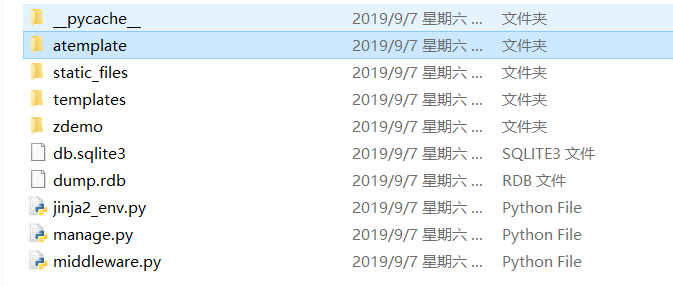
```python
def simple_middleware(get_response):
    # 此处编写的代码仅在Django第一次配置和初始化的时候执行一次。
    print('----init----DEBUG模式会打两次')
    def middleware(request):
        # 此处编写的代码会在每个请求处理视图前被调用。
        print('处理请求对象之前------1111111-',request.method)
        response = get_response(request)
        print('处理请求对象之后------111111-', request.method)
        # 此处编写的代码会在每个请求处理视图之后被调用。

        return response

    return middleware

def simple_middlewareTwo(get_response):
    # 此处编写的代码仅在Django第一次配置和初始化的时候执行一次。
    print('----init----DEBUG模式会打两次')
    def middleware(request):
        # 此处编写的代码会在每个请求处理视图前被调用。
        print('处理请求对象之前-----222222-',request.method)
        response = get_response(request)
        print('处理请求对象之后------2222-', request.method)
        # 此处编写的代码会在每个请求处理视图之后被调用。

        return response

    return middleware
```


- 定义好中间件后，需要在settings.py 文件中添加注册中间件

```python

# Application definition

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    # django自动代session子应用
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',

    'atemplate.apps.AtemplateConfig',
]

# 中间件
MIDDLEWARE = [
    'django.middleware.security.SecurityMiddleware',
    # django自带 session中间件
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.common.CommonMiddleware',
    # 'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',

#     'middleware.simple_middleware',
    'middleware.simple_middlewareTwo',
]


# 定义一个视图进行测试
def demo_view(request):
    print('view 视图被调用')
    return HttpResponse('OK')

```
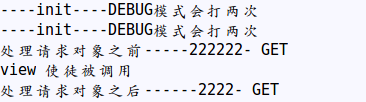

# ORM操作

    
```python

from django.db import models

#定义图书模型类BookInfo
class BookInfo(models.Model):
    btitle = models.CharField(max_length=20, verbose_name='名称')
    bpub_date = models.DateField(verbose_name='发布日期')
    bread = models.IntegerField(default=0, verbose_name='阅读量')
    bcomment = models.IntegerField(default=0, verbose_name='评论量')
    is_delete = models.BooleanField(default=False, verbose_name='逻辑删除')

    class Meta:
        db_table = 'tb_books'  # 指明数据库表名
        verbose_name = '图书'  # 在admin站点中显示的名称
        verbose_name_plural = verbose_name  # 显示的复数名称

    def __str__(self):
        """定义每个数据对象的显示信息"""
        return self.btitle

#定义英雄模型类HeroInfo
class HeroInfo(models.Model):
    GENDER_CHOICES = (
        (0, 'female'),
        (1, 'male')
    )
    hname = models.CharField(max_length=20, verbose_name='名称')
    hgender = models.SmallIntegerField(choices=GENDER_CHOICES, default=0, verbose_name='性别')
    hcomment = models.CharField(max_length=200, null=True, verbose_name='描述信息')
    hbook = models.ForeignKey(BookInfo, on_delete=models.CASCADE, verbose_name='图书')  # 外键
    is_delete = models.BooleanField(default=False, verbose_name='逻辑删除')

    class Meta:
        db_table = 'tb_heros'
        verbose_name = '英雄'
        verbose_name_plural = verbose_name

    def __str__(self):
        return self.hname
    
```

```python
from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse
from datetime import datetime, date

from django.views import View
from django.db.models import Sum,Avg,Max,Min,Count

from .models import BookInfo, HeroInfo



# ＯＲＭ的增删改查

class OrmView(View):
    # # 1.增加　２　中方法
    # def post(self,request):
    #     # 1）save()
    #     book = BookInfo(btitle='西游记',
    #                     bpub_date=date(1988,1,1),
    #                     bread=10,
    #                     bcomment=10)
    #     book.save()
    #
    #     hero = HeroInfo(
    #         hname="送悟空",
    #         hgender=0,
    #         hbook=book,
    #         hcomment= "七十二变"
    #     )
    #     hero.save()
    #     #　2create()
    #     BookInfo.objects.create(
    #         btitle="鹿鼎记",
    #         bpub_date=date(1999, 10, 10)
    #     )
    #     return HttpResponse("数据添加成功")


    # # 删除　delete
    # def delete(self, request):
    #     # book = BookInfo.objects.get(id=7)
    #     # book.delete()
    #
    #     BookInfo.objects.filter(id=8).delete()
    #
    #     return HttpResponse("数据删除成功")

    # # 修改　put
    # def put(self,request):
    #     # book = BookInfo.objects.get(id=1)
    #     # book.btitle = "射雕"
    #     # book.save()
    #
    #     # hero = HeroInfo.objects.get(id=18)
    #     # hero.hcomment = "七十二变"
    #     # hero.save()
    #
    #     BookInfo.objects.filter(id=1).update(btitle="射雕英雄传")
    #
    #     return HttpResponse("数据修改成功")

    # 查询　get(), all(), filter()
    def get(self, request):
        # books = BookInfo.objects.all()
        # # print(books,type(books))
        # return render(request,"jinja_index.html",context={"books": books})
        # # return HttpResponse(books)

        # 过滤运算符:
        # 1.判断相等  exact
        # 2.判空     isnull
        # 3.范围     in
        # 4.模糊查询  contains startswith endswith
        # 5.条件    gt lt gte lte
        # 6.year month day hour

        # # 过滤查询: filter(属性__运算符=值) exclude(不包含) all() --->querySet 查询集
        # book = BookInfo.objects.get(id=1)
        # # 1.判断相等  exact
        # book = BookInfo.objects.get(id__exact=1)
        # book = BookInfo.objects.filter(id=1)

        # # 2.判断不想等
        # book = BookInfo.objects.exclude(id=2)

        # # ３.判是否为空     isnull
        # book = BookInfo.objects.filter(btitle__isnull=False)
        # book = BookInfo.objects.all()

        # # 4.范围     in
        # book = BookInfo.objects.filter(id__in = [1, 4])

        # # 5.模糊查询  contains startswith endswith
        # book = BookInfo.objects.filter(btitle__contains="龙")
        # book = BookInfo.objects.filter(btitle__startswith="雪")

        # ６.条件    gt lt gte lte
        # gt 大于(greater then)
        # gte 大于等于(greater then equal)
        # lt 小于(less then)
        # lte 小于等于(less then equal)

        # book = BookInfo.objects.filter(id__lt=3)

        # 7.ear month day hour 关键字
        # # 查询１９８０年发表的图书
        # book = BookInfo.objects.filter(bpub_date__year=1980)
        # # 查询1980年1月1日后发表的图书。
        # book = BookInfo.objects.filter(bpub_date__gt=date(1990,1,1))

        # print(book)
        # return HttpResponse(book)


        # F 对象　和　Ｑ　对象

        # count()统计个数
        # 聚合查询　aggregate() --> Sum() Avg() Max() Min() Count()

        # # 求bread 的总和
        # count = BookInfo.objects.aggregate(Sum('bread'))
        # print(count)
        # return HttpResponse(count)

        # # 排序 默认升序,  降序 -id order_by()
        # order = BookInfo.objects.order_by("-id")
        # print(order)
        # return HttpResponse(order)

        # # 1.根据 书 --所有的英雄all()
        # book = BookInfo.objects.get(id=2)
        # hero = book.heroinfo_set.all()
        # print(hero)
        # return HttpResponse(hero)
        # 1:n(外键)--- 关联模型类纯小写_set 或者 related_name
        # n(外键):1---- 直接外键属性

        # # 2.根据英雄 --那本书
        # hero = HeroInfo.objects.get(hname='郭靖')
        # book = hero.hbook
        # print(book)
        # return HttpResponse(book)

        # 关联过滤查询
        # 查询图书，要求图书英雄为"任盈盈"
        # book = BookInfo.objects.filter(heroinfo__hname='任盈盈')
        # print(book)
        # return HttpResponse(book)

        # 查询书名为“天龙八部的所有英雄”
        hero = HeroInfo.objects.filter(hbook__btitle="天龙八部")
        print(hero)
        return HttpResponse(hero)

```

# 多个中间件的执行顺序
在请求视图被处理前，中间件由上至下依次执行
在请求视图被处理后，中间件由下至上依次执行

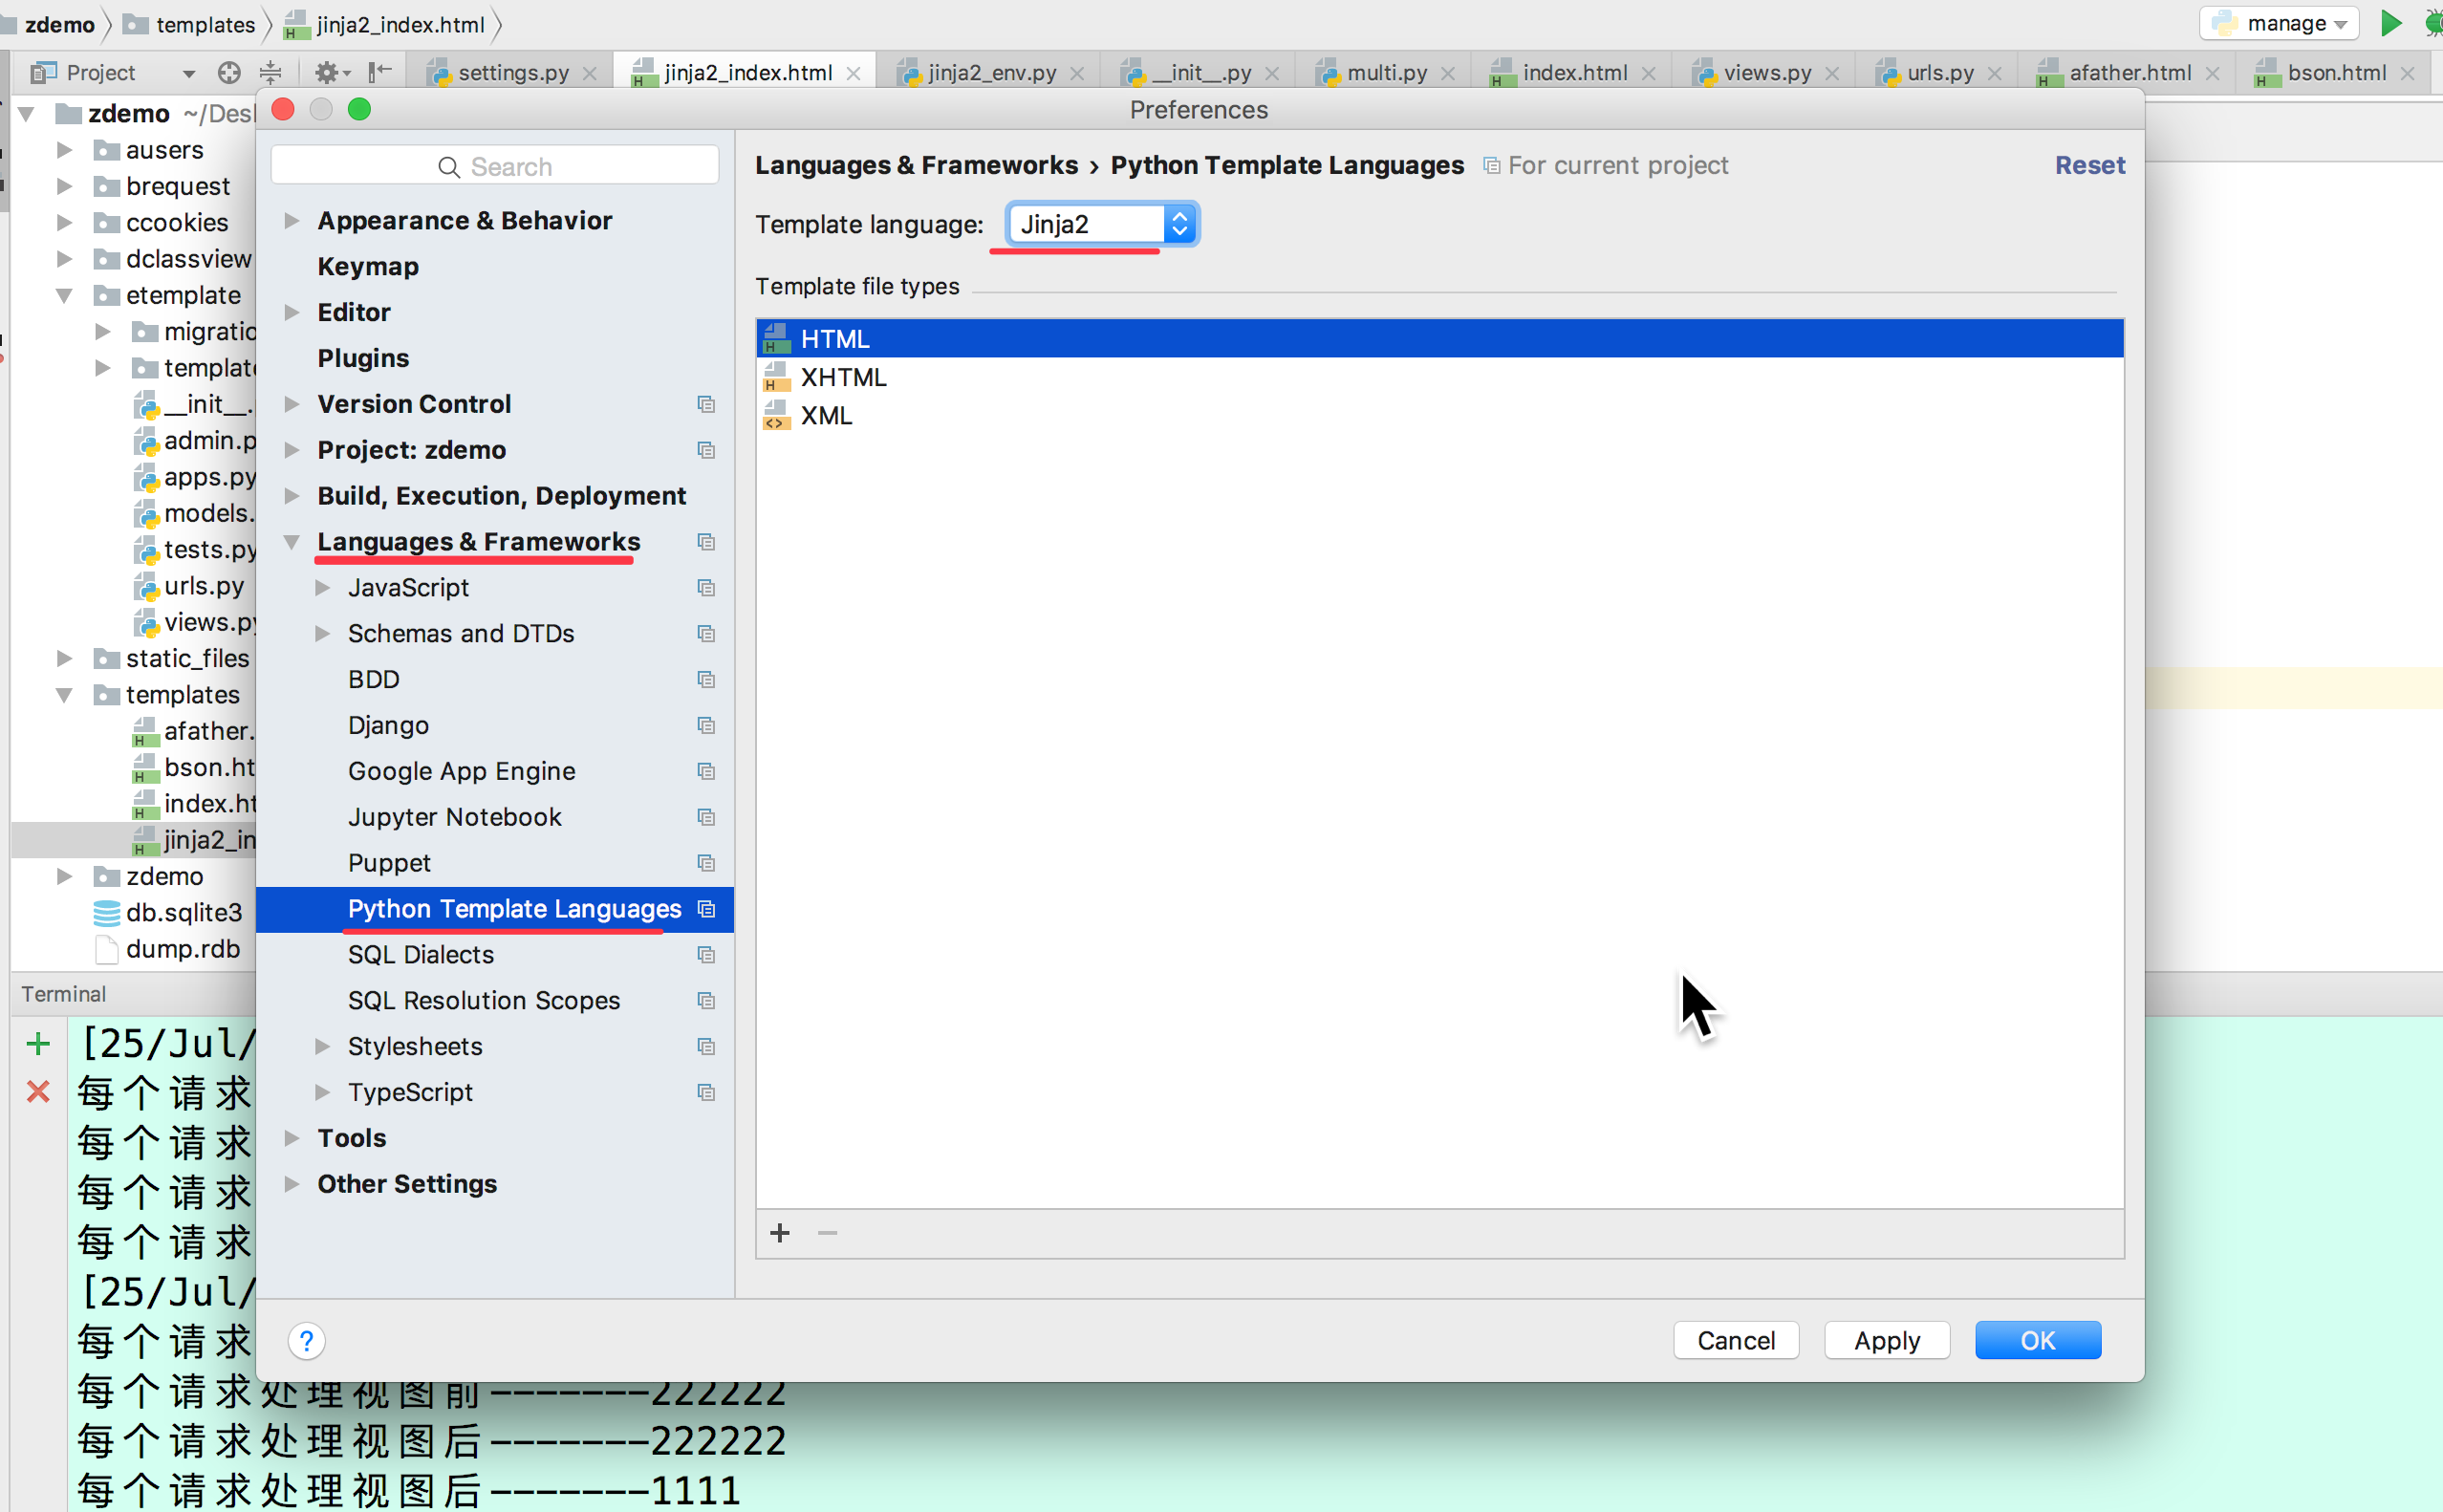

# 设置为jinja2代码提示
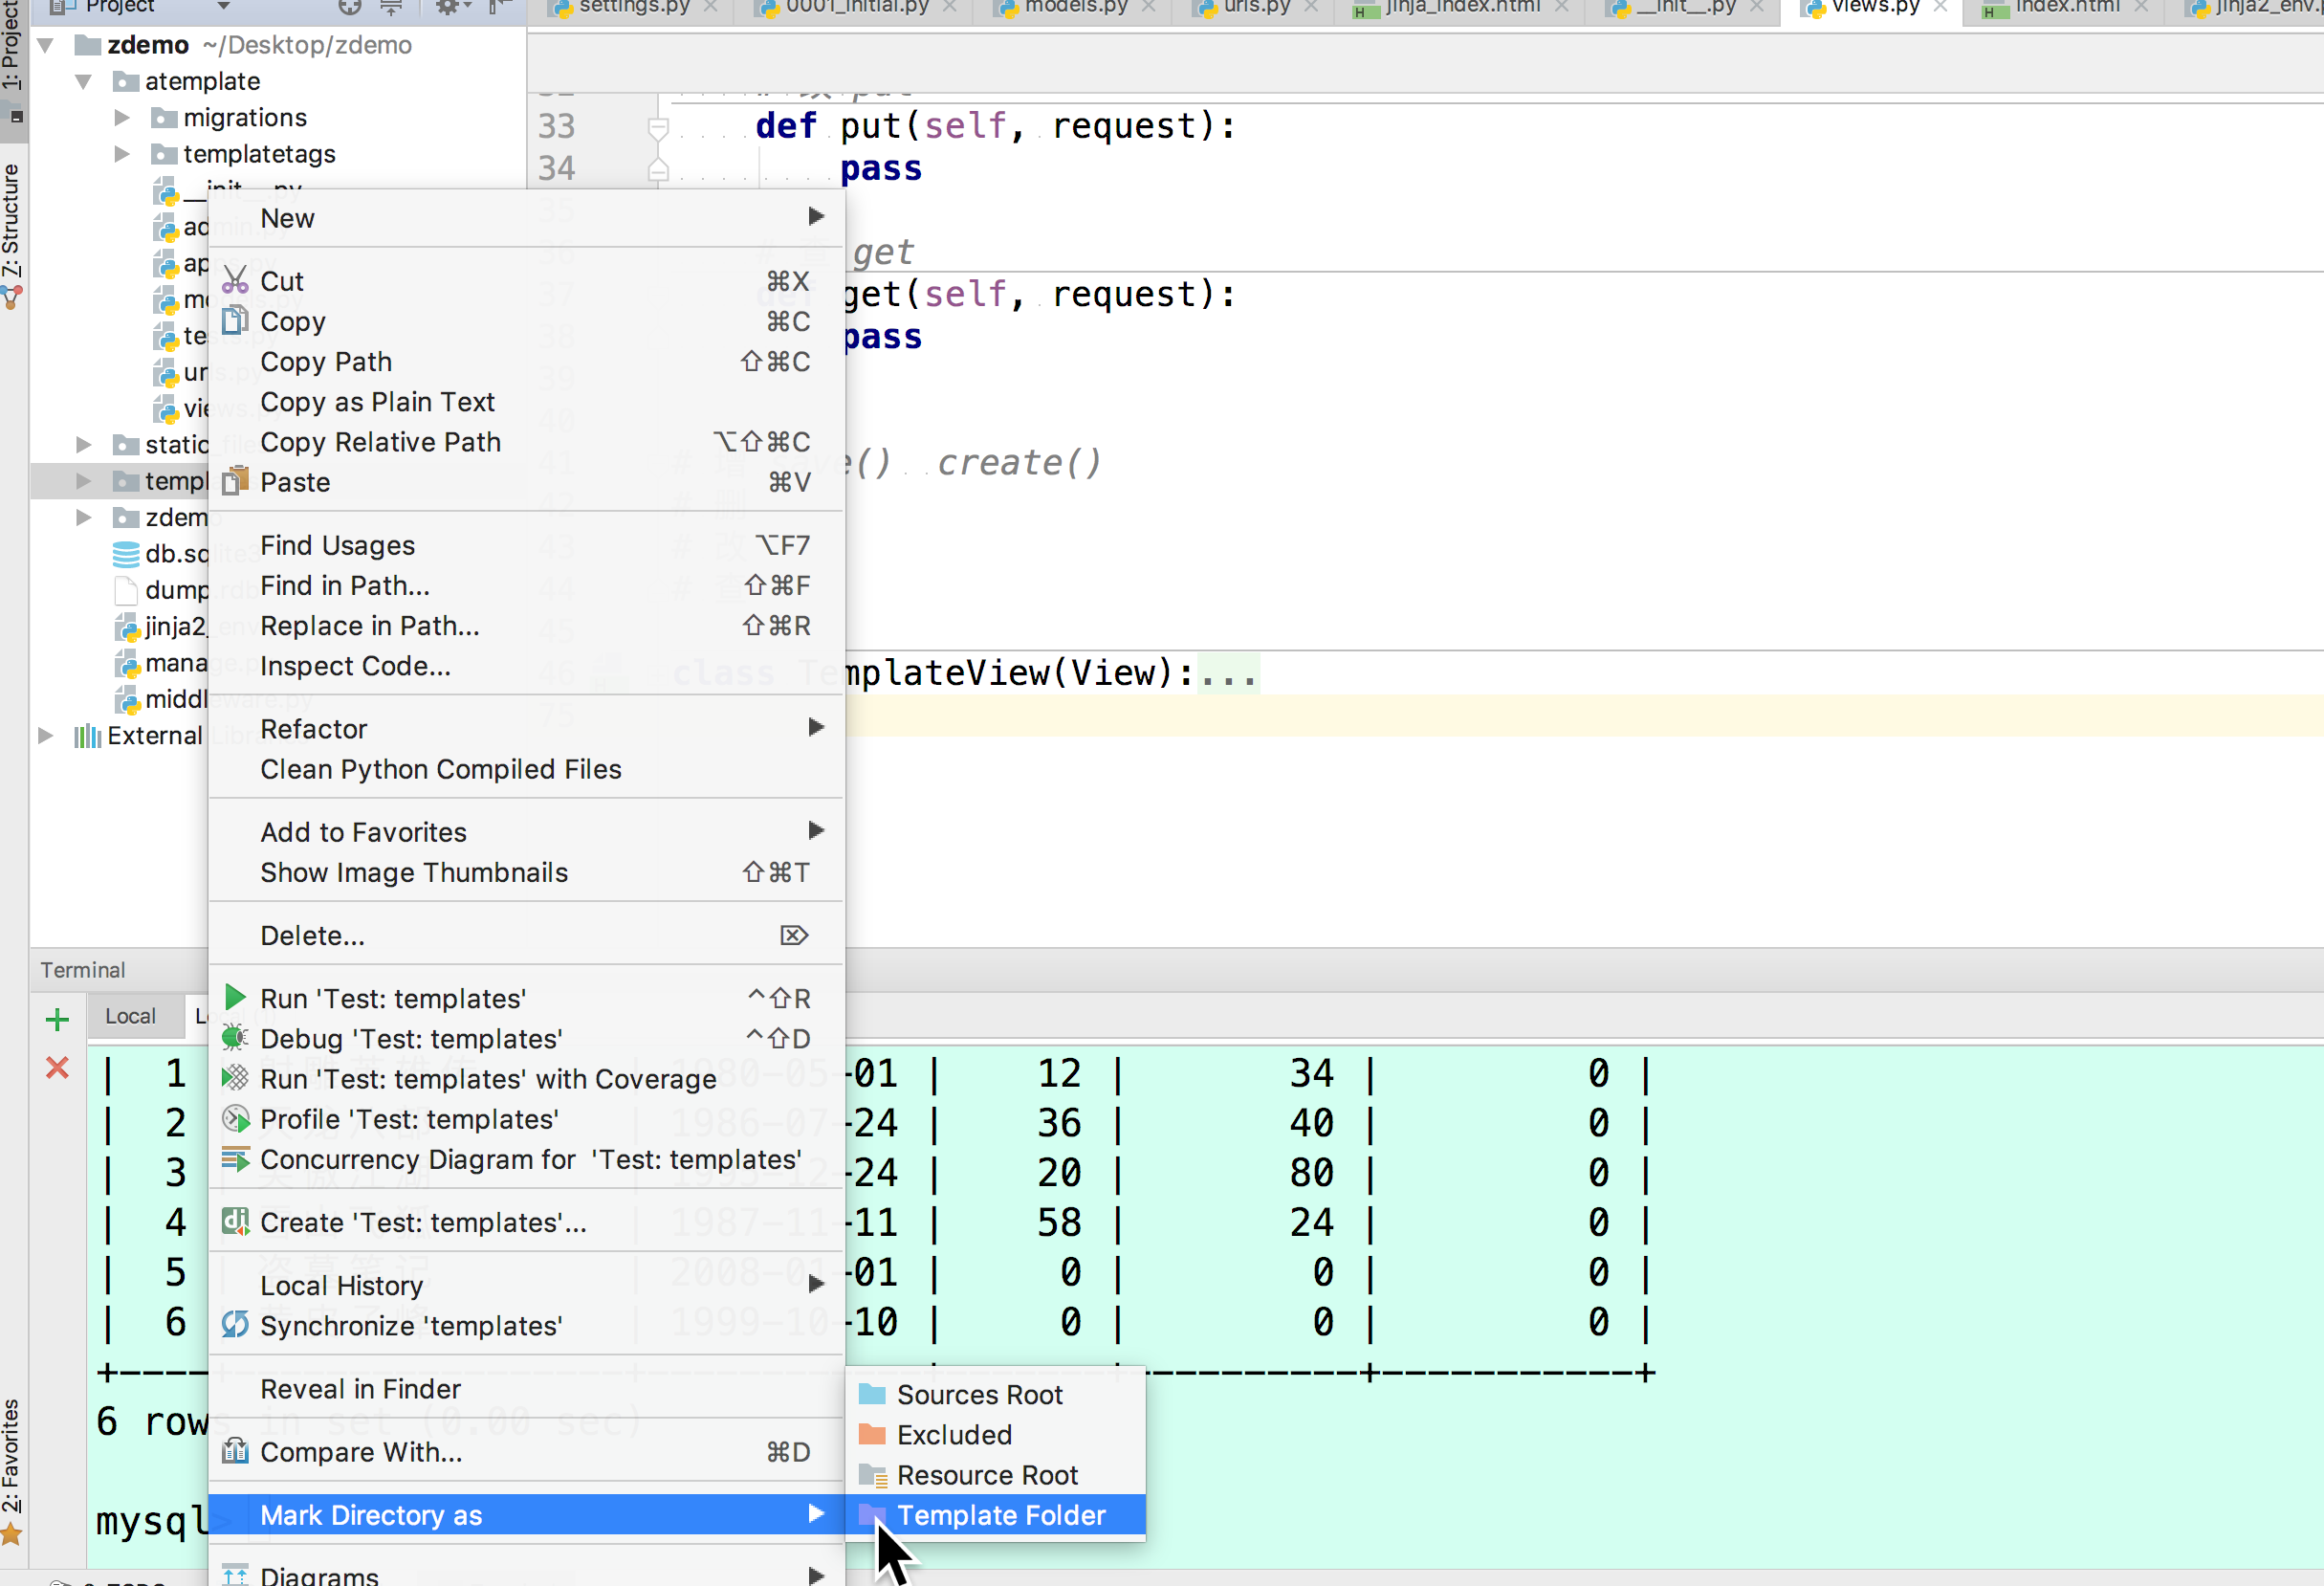